In [13]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
metrics_df = pd.read_csv('../data/processed/run_plays_12-18_0.csv')

## Tackle Type
Remove forcedFumbles because the tackler (by definition) does not complete a tackle on the ball carrier. This leaves ambiguity about the ability for the tackler to bring the ball carrier down.

Assists are mapped to tackles.
- Another option to consider: removing all plays where there is an assist. This could make tackles more clear when only one player is amkeing or missing a tackle

In [3]:
metrics_df['event'].replace('assist', 'tackle', inplace=True)

In [4]:
metrics_df.drop(metrics_df[metrics_df['event'] == 'forcedFumble'].index, inplace=True)

## Time to Contact
One tackler had a speed of 0 at the frame of interest. This causes the time to contact to be infinite. To avoid errors in plotting, this infinite value is replaced with 1000.

In [7]:
metrics_df['tackler_time_to_contact'].replace([np.inf, -np.inf], 1000, inplace=True)
metrics_df['ball_carrier_time_to_contact'].replace([np.inf, -np.inf], 1000, inplace=True)
metrics_df['diff_time_to_contact'].replace([np.inf, -np.inf], 1000, inplace=True)

In [8]:
# must be within field of play, and less than 5 seconds from contact point at current speed
metrics_df['make_contact'] = ((metrics_df['x_contact'] < 110) & 
                              (metrics_df['x_contact'] > 0) &
                              (abs(metrics_df['diff_time_to_contact']) < 5)
                             )

In [9]:
metrics_df['in_field'] = ((metrics_df['x_contact'] < 110) & 
                          (metrics_df['x_contact'] > 0) &
                          (metrics_df['y_contact'] < 53.3) & 
                          (metrics_df['y_contact'] > 0)
                         )

## Momentum
The momentum_x_diff is calculated by subtracting the tackler x momentum from the ball carrier x momentum. But the tackler "should" be moving in the opposite direction as the ball carrier, so the tackler momentum "should" be negative. To acheive the correct signs at the end of the calculation the momentums in the x direction should be added.

In [10]:
metrics_df['momentum_x_add'] = metrics_df['momentum_x_ball_carrier'] + metrics_df['momentum_x']

## Reduce to Contact Only

Remove examples where the contact point is behind either player or outside of the bounds of the field.

In [11]:
metrics_df = metrics_df[metrics_df['in_field'] & (metrics_df['behind_player'] == False)]

# Distance Check
Confirm distances match expected behavior:
- run = almost all plays very close to 1 yard
- pass = wider distribution, possibly bimodal 
    * some defenders have to catch up to the reciever after they catch the ball
    * some defenders are within 1 yard when the catch is made

In [12]:
sns.histplot(metrics_df, x='tackler_to_ball_carrier_dist', kde=True)

NameError: name 'sns' is not defined

# Plotting

In [14]:
def hist(df, metric):
    sns.histplot(df, x=metric, hue="event", kde=True)
    plt.show()

In [15]:
def violin(df, metric):
    sns.violinplot(df, x=metric, y="event")
    plt.show()

In [16]:
def box(df, metric):
    sns.boxplot(df, x=metric, y="event")
    plt.show()

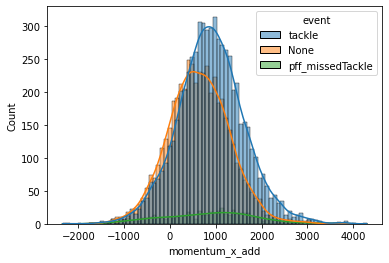

In [17]:
hist(metrics_df, "momentum_x_add")

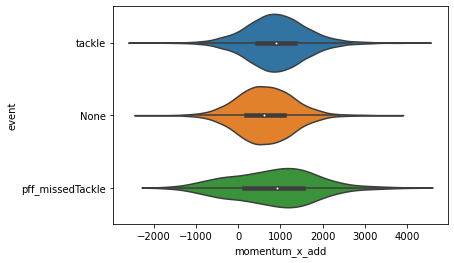

In [18]:
violin(metrics_df, "momentum_x_add")

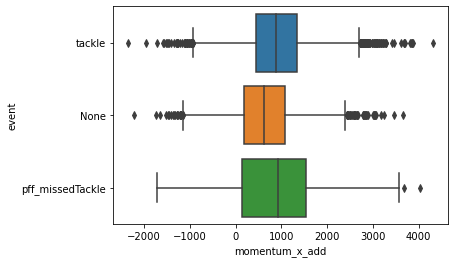

In [19]:
box(metrics_df, "momentum_x_add")

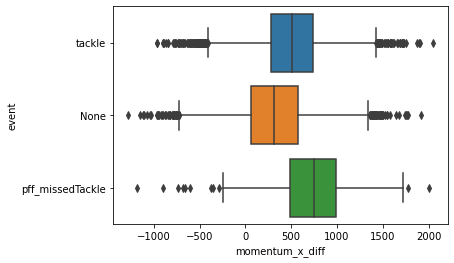

In [20]:
box(metrics_df, "momentum_x_diff")

In [21]:
metrics_df.columns

Index(['gameId', 'playId', 'event', 'nflId', 'frameId', 'displayName', 'club',
       'weight', 'position', 'x', 'y', 's', 'a', 'dis', 'o', 'dir', 'dir_cos',
       'dir_sin', 'dir_tan', 'slope', 'o_sin', 'force', 'force_x', 'force_y',
       'momentum', 'momentum_x', 'momentum_y', 'momentum_y_abs', 'in_phase',
       'nflId_ball_carrier', 'displayName_ball_carrier', 'club_ball_carrier',
       'x_ball_carrier', 'y_ball_carrier', 's_ball_carrier', 'a_ball_carrier',
       'dis_ball_carrier', 'o_ball_carrier', 'dir_ball_carrier',
       'dir_cos_ball_carrier', 'dir_sin_ball_carrier', 'dir_tan_ball_carrier',
       'slope_ball_carrier', 'o_sin_ball_carrier', 'force_ball_carrier',
       'force_x_ball_carrier', 'force_y_ball_carrier', 'momentum_ball_carrier',
       'momentum_x_ball_carrier', 'momentum_y_ball_carrier',
       'momentum_y_abs_ball_carrier', 'in_phase_ball_carrier',
       'weight_ball_carrier', 'tackler_to_ball_carrier_dist', 'force_diff',
       'force_sum', 'force_x_diff

In [22]:
single_player_metric_columns = [
       'x', 'y', 's', 'a', 'dis', 'o', 'dir',
       'force', 'force_x', 'force_y', 'momentum', 'momentum_x',
       'momentum_y', 'in_phase', 'x_ball_carrier',
       'y_ball_carrier', 's_ball_carrier', 'a_ball_carrier',
       'dis_ball_carrier', 'o_ball_carrier', 'dir_ball_carrier',
       'force_ball_carrier', 'force_x_ball_carrier',
       'force_y_ball_carrier', 'momentum_ball_carrier',
       'momentum_x_ball_carrier', 'momentum_y_ball_carrier',
       'in_phase_ball_carrier', 'contact_angle_momentum']
player_diff_metric_columns = [
       'tackler_to_ball_carrier_dist', 'force_diff', 'force_sum',
       'force_x_diff', 'force_x_sum', 'force_y_diff', 'force_y_sum',
       'momentum_diff', 'momentum_sum', 'momentum_x_diff', 'momentum_x_sum',
       'momentum_y_diff', 'momentum_y_sum',
       'x_contact', 'y_contact', 'tackler_to_contact_dist',
       'ball_carrier_to_contact_dist', 'tackler_time_to_contact',
       'ball_carrier_time_to_contact', 'diff_time_to_contact', 'contact_angle',
       'contact_angle_cos', 'contact_angle_force', 'contact_angle_force_y',
       'contact_angle_force_y_abs',
       'contact_angle_force_diff', 'contact_angle_force_sum', 
       'contact_angle_momentum', 'contact_angle_momentum_y',
       'contact_angle_momentum_y_abs',
       'contact_angle_momentum_diff', 'contact_angle_momentum_sum']

x


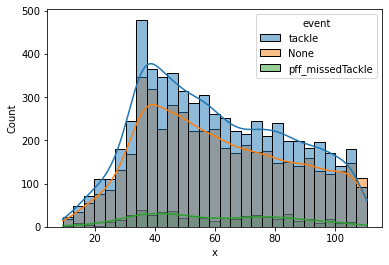

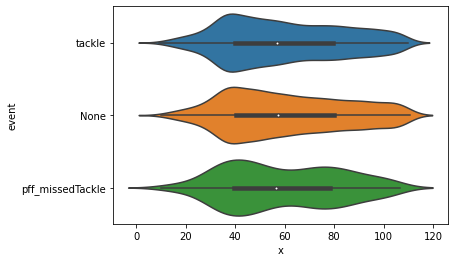

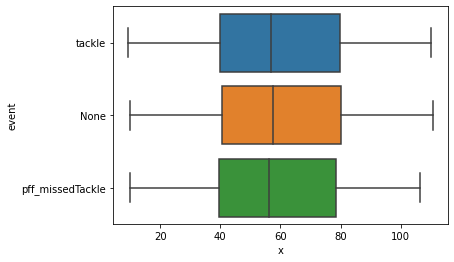

----------------------------------------------------
----------------------------------------------------
y


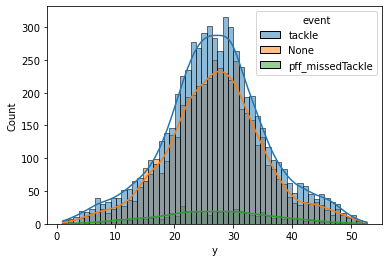

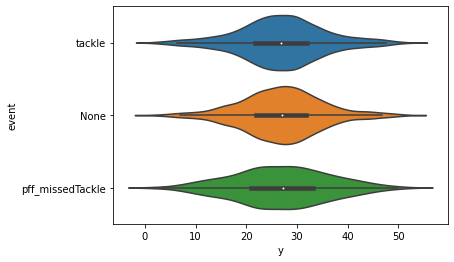

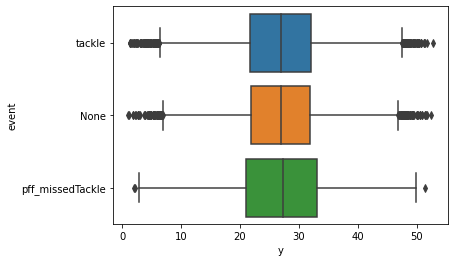

----------------------------------------------------
----------------------------------------------------
s


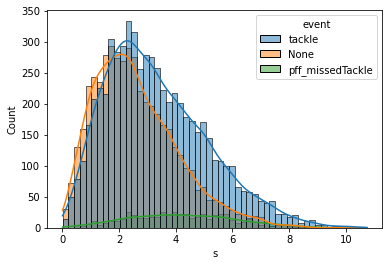

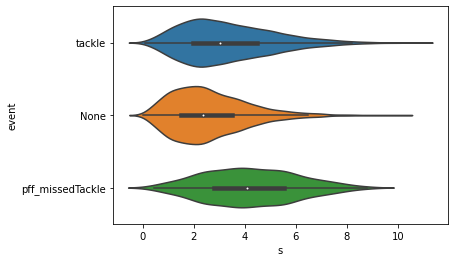

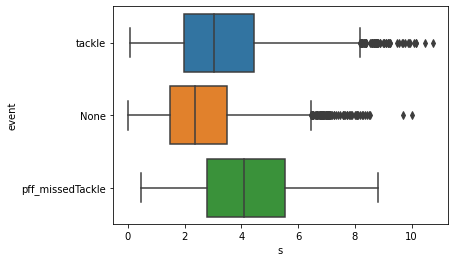

----------------------------------------------------
----------------------------------------------------
a


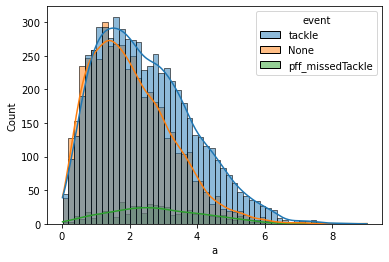

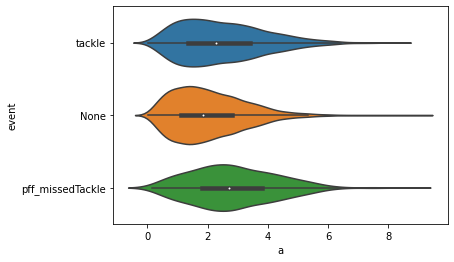

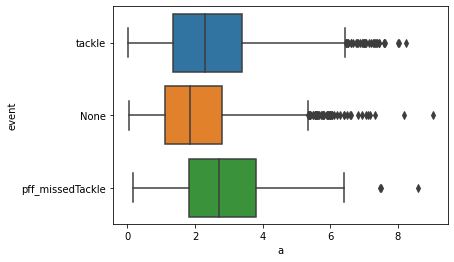

----------------------------------------------------
----------------------------------------------------
dis


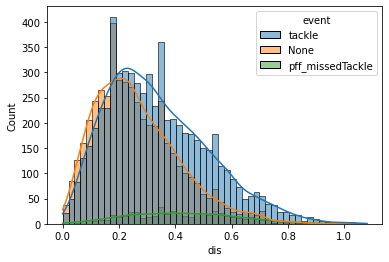

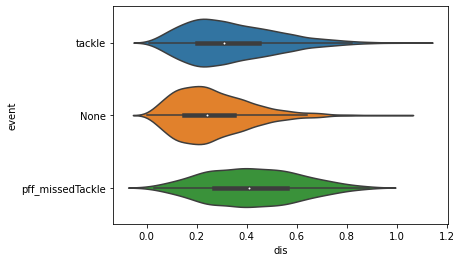

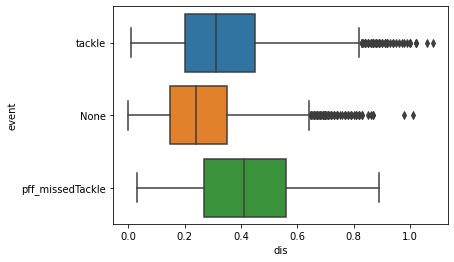

----------------------------------------------------
----------------------------------------------------
o


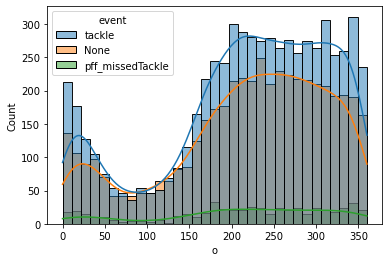

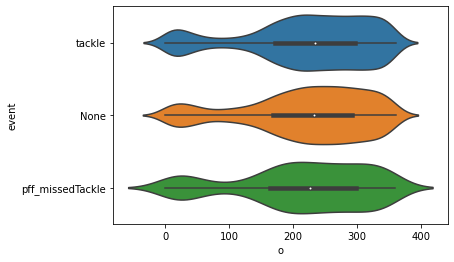

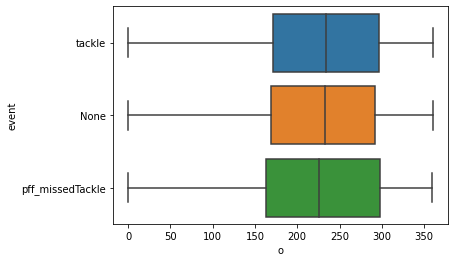

----------------------------------------------------
----------------------------------------------------
dir


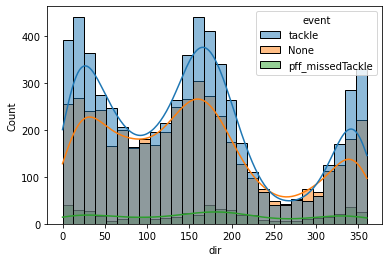

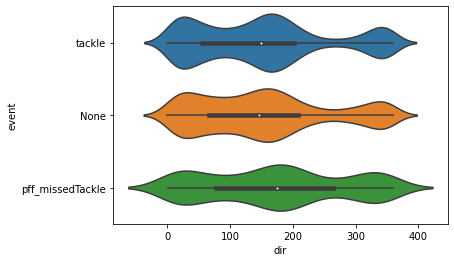

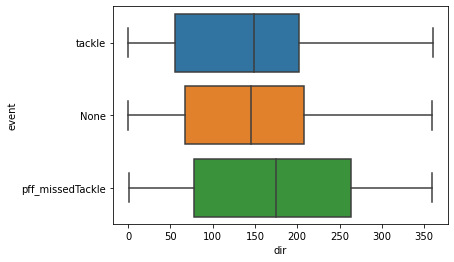

----------------------------------------------------
----------------------------------------------------
force


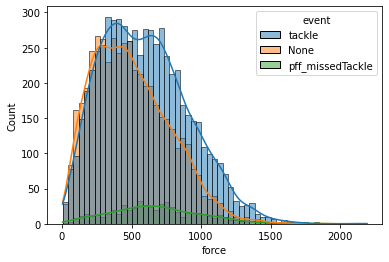

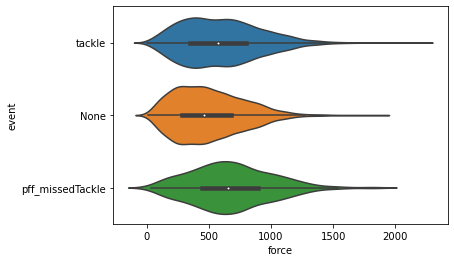

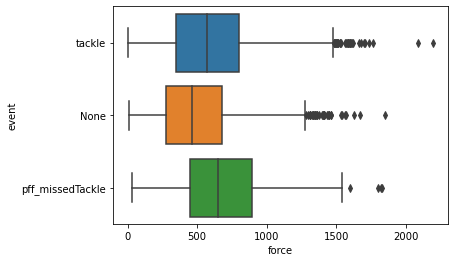

----------------------------------------------------
----------------------------------------------------
force_x


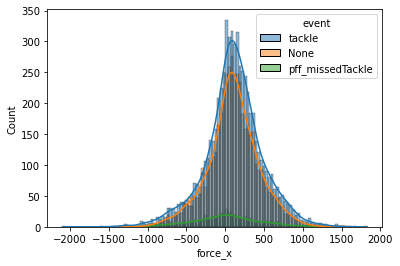

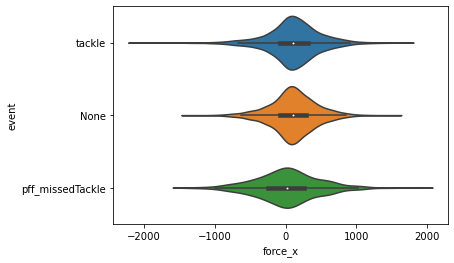

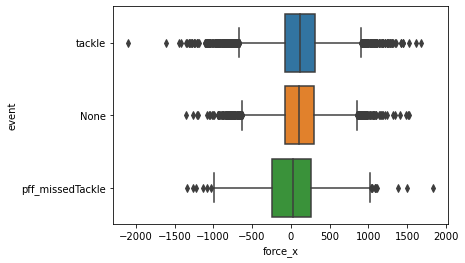

----------------------------------------------------
----------------------------------------------------
force_y


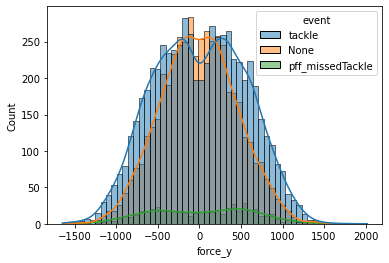

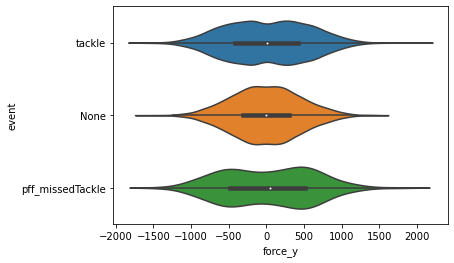

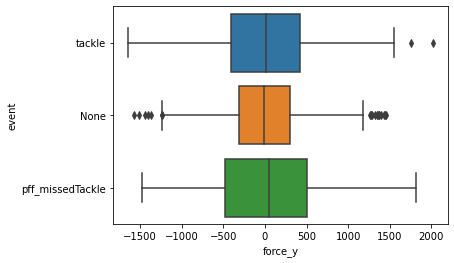

----------------------------------------------------
----------------------------------------------------
momentum


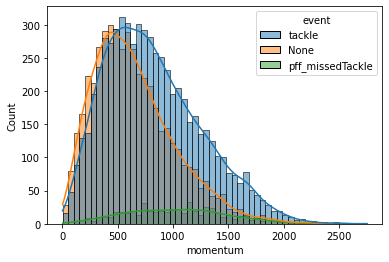

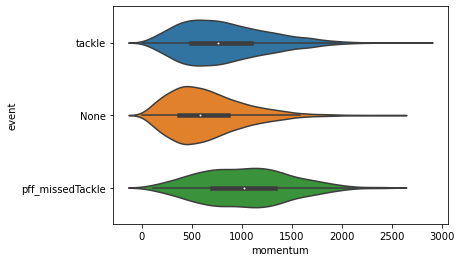

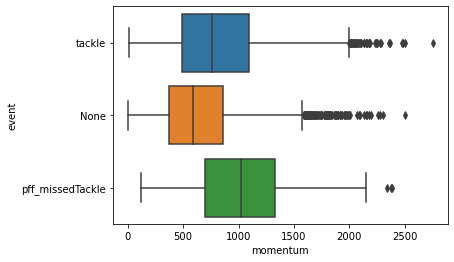

----------------------------------------------------
----------------------------------------------------
momentum_x


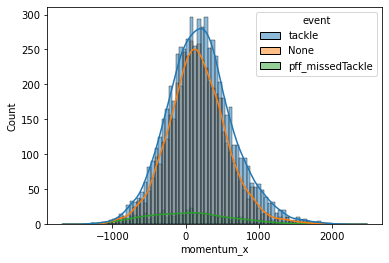

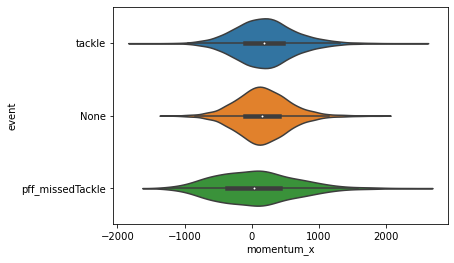

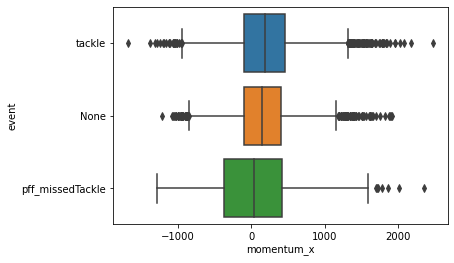

----------------------------------------------------
----------------------------------------------------
momentum_y


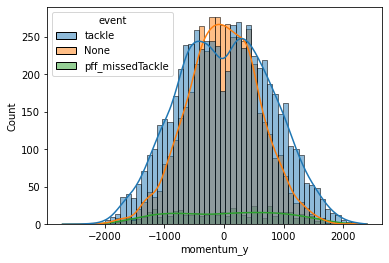

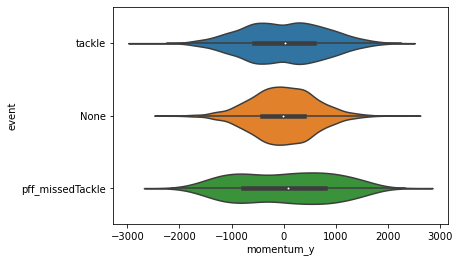

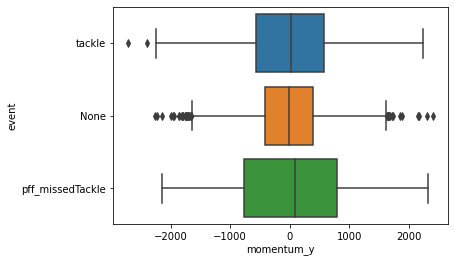

----------------------------------------------------
----------------------------------------------------
in_phase


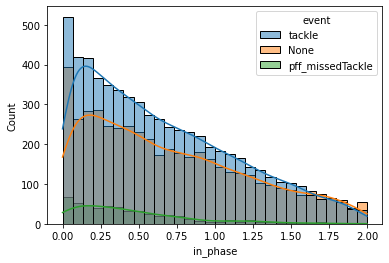

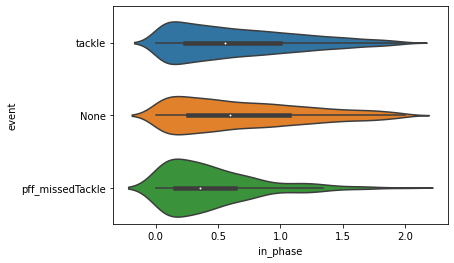

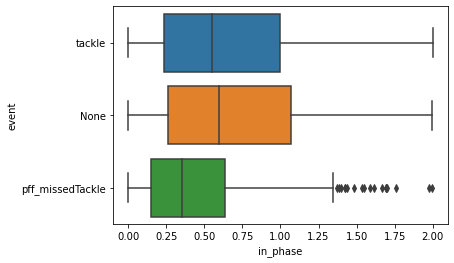

----------------------------------------------------
----------------------------------------------------
x_ball_carrier


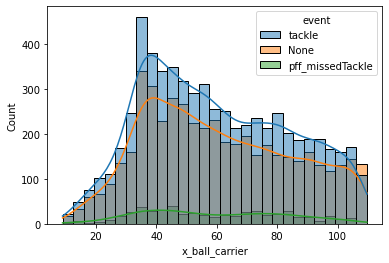

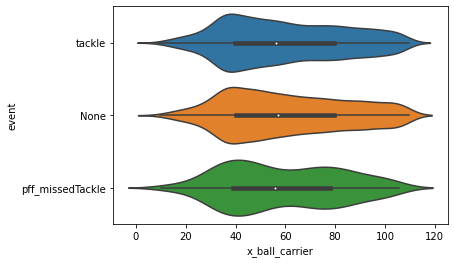

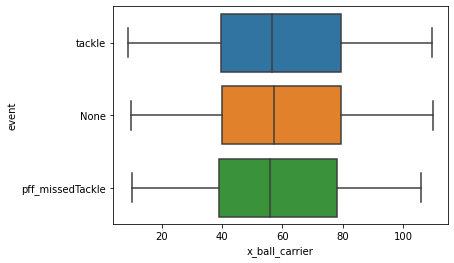

----------------------------------------------------
----------------------------------------------------
y_ball_carrier


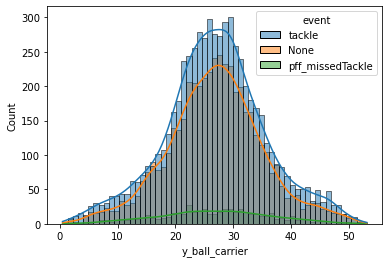

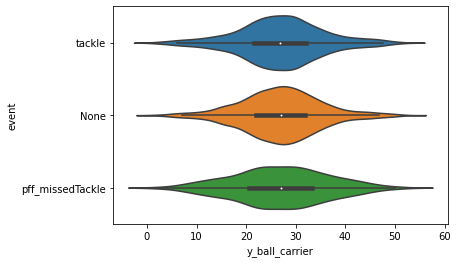

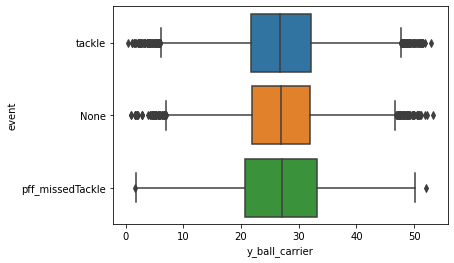

----------------------------------------------------
----------------------------------------------------
s_ball_carrier


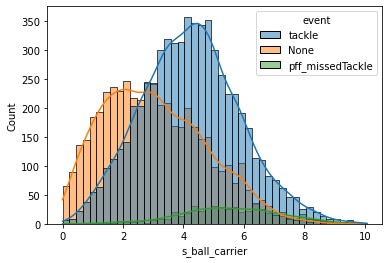

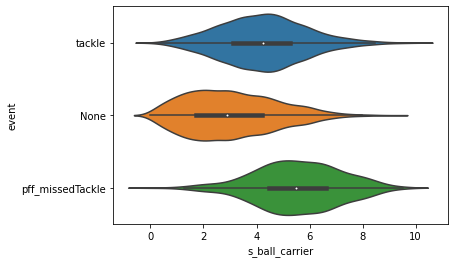

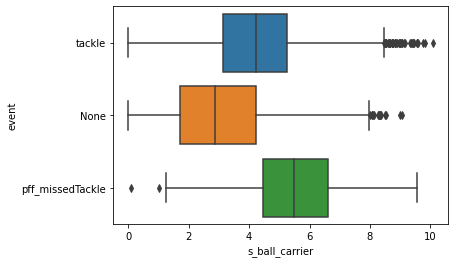

----------------------------------------------------
----------------------------------------------------
a_ball_carrier


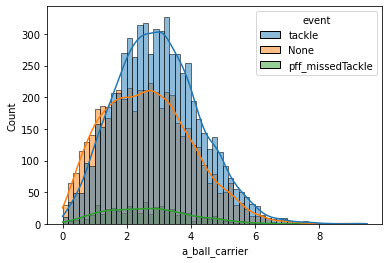

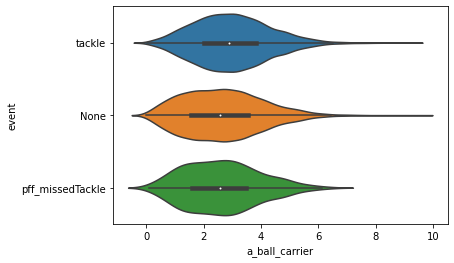

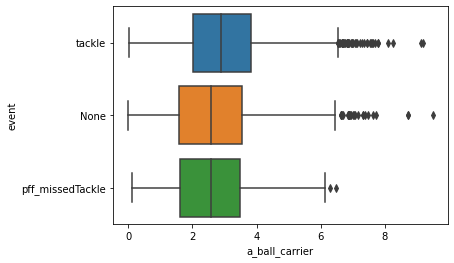

----------------------------------------------------
----------------------------------------------------
dis_ball_carrier


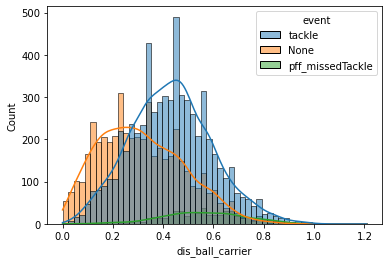

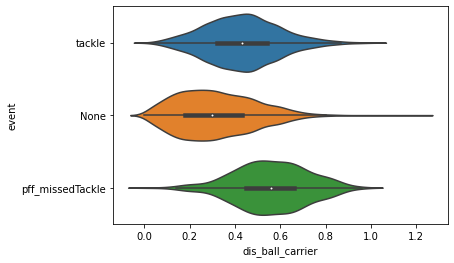

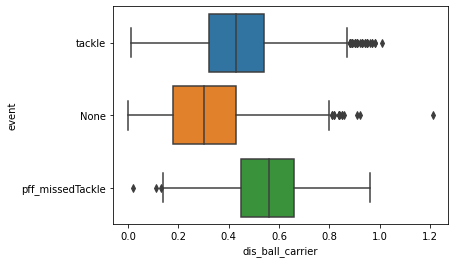

----------------------------------------------------
----------------------------------------------------
o_ball_carrier


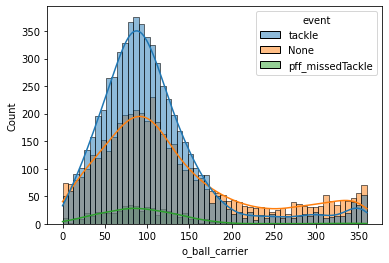

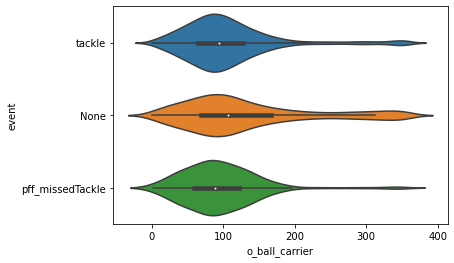

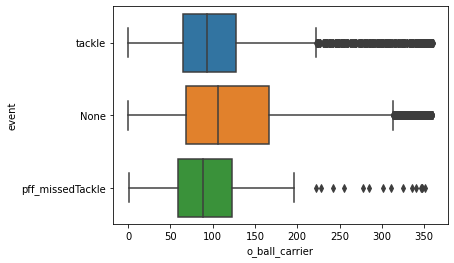

----------------------------------------------------
----------------------------------------------------
dir_ball_carrier


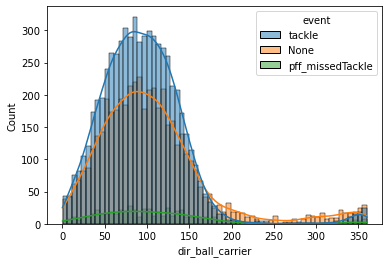

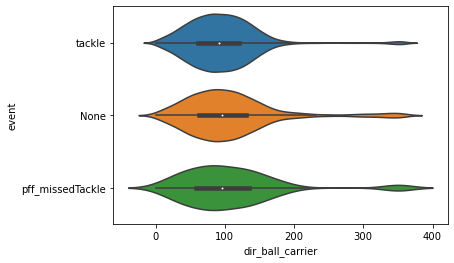

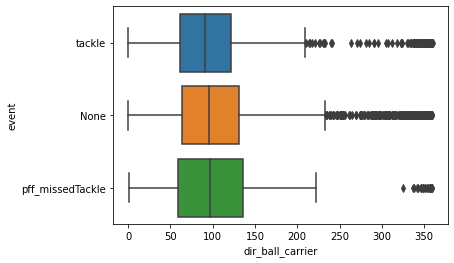

----------------------------------------------------
----------------------------------------------------
force_ball_carrier


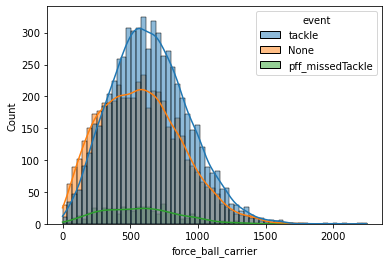

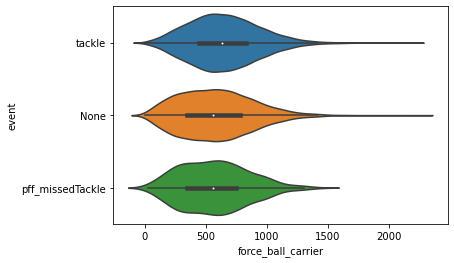

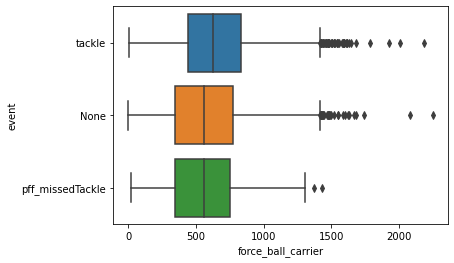

----------------------------------------------------
----------------------------------------------------
force_x_ball_carrier


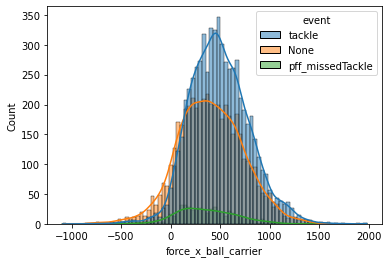

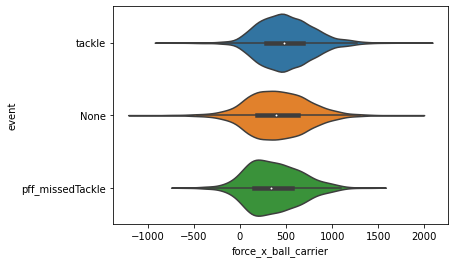

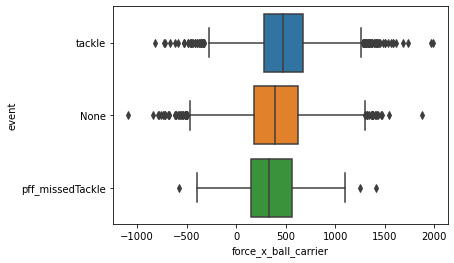

----------------------------------------------------
----------------------------------------------------
force_y_ball_carrier


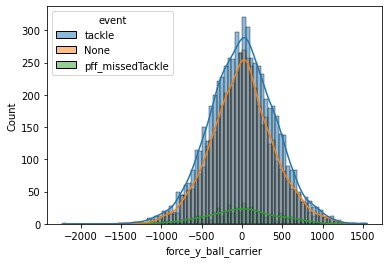

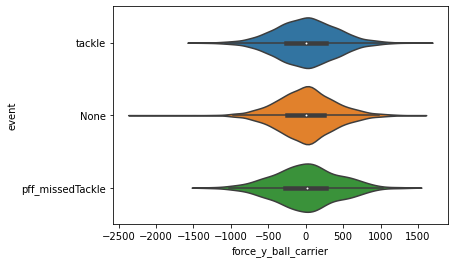

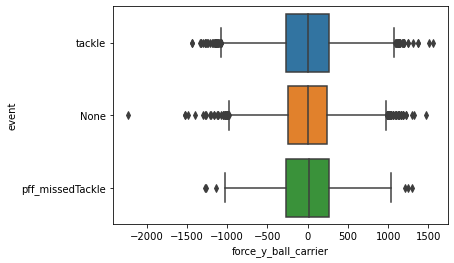

----------------------------------------------------
----------------------------------------------------
momentum_ball_carrier


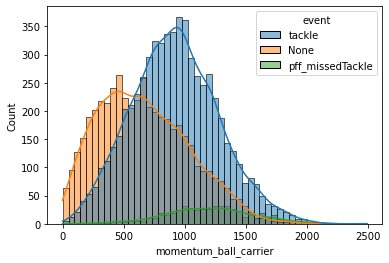

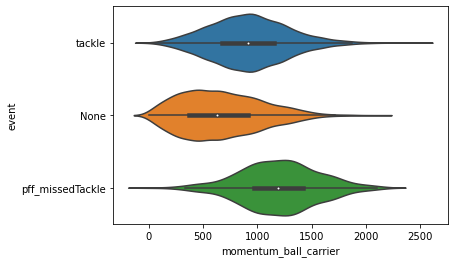

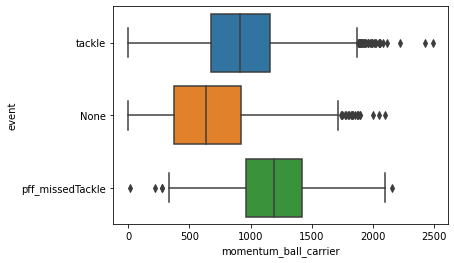

----------------------------------------------------
----------------------------------------------------
momentum_x_ball_carrier


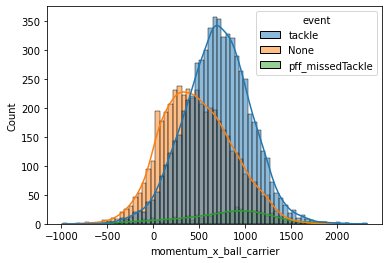

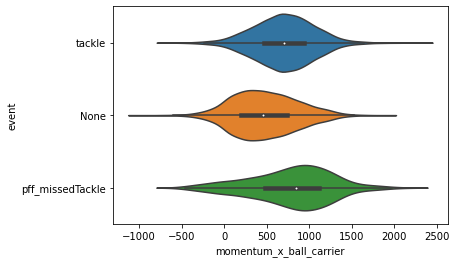

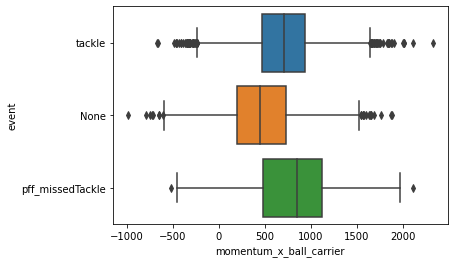

----------------------------------------------------
----------------------------------------------------
momentum_y_ball_carrier


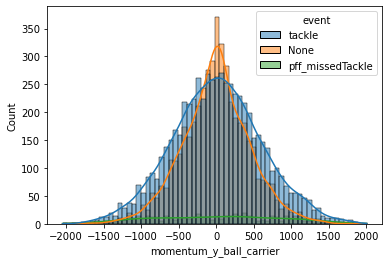

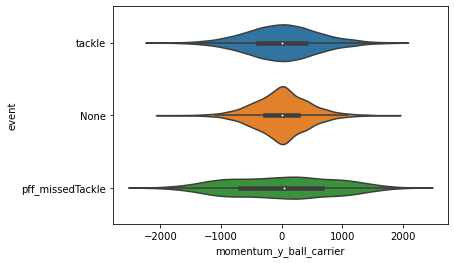

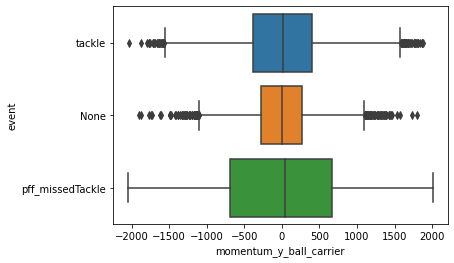

----------------------------------------------------
----------------------------------------------------
in_phase_ball_carrier


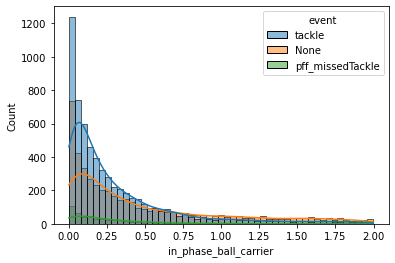

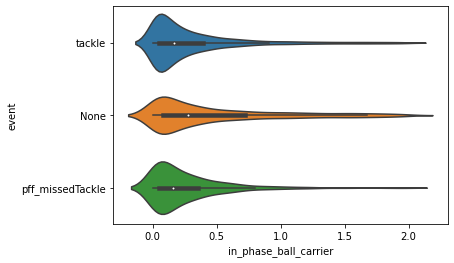

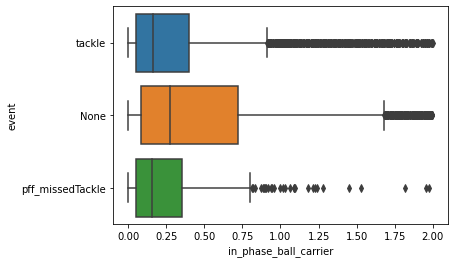

----------------------------------------------------
----------------------------------------------------
contact_angle_momentum


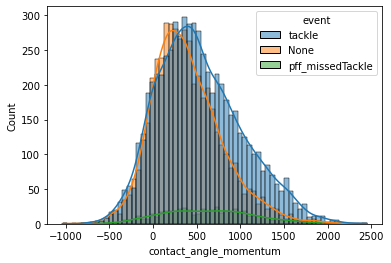

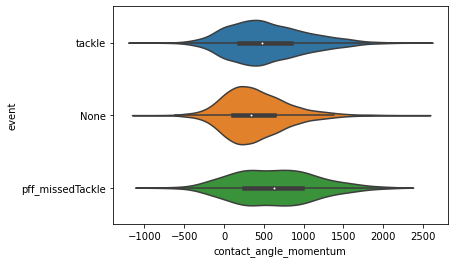

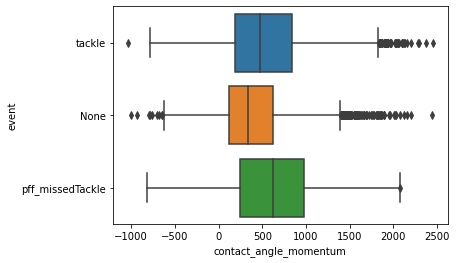

----------------------------------------------------
----------------------------------------------------


In [23]:
for metric in single_player_metric_columns:
    print(metric)
    hist(metrics_df, metric)
    violin(metrics_df, metric)
    box(metrics_df, metric)
    print("----------------------------------------------------")
    print("----------------------------------------------------")

tackler_to_ball_carrier_dist


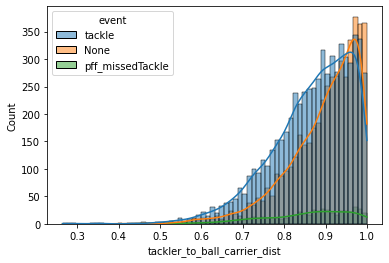

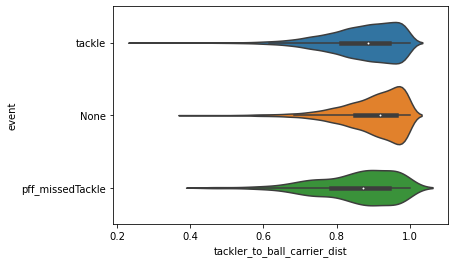

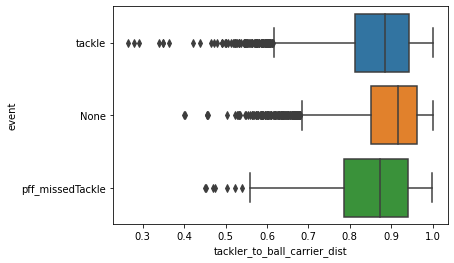

----------------------------------------------------
----------------------------------------------------
force_diff


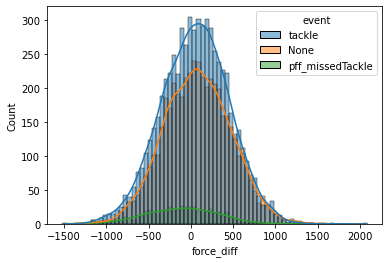

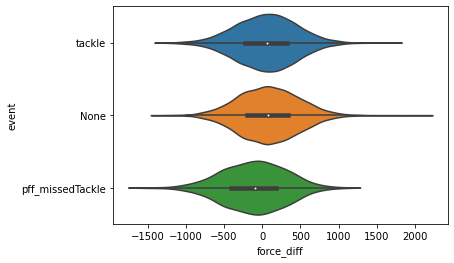

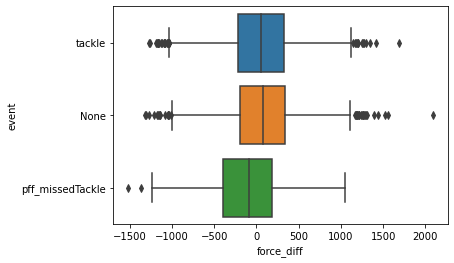

----------------------------------------------------
----------------------------------------------------
force_sum


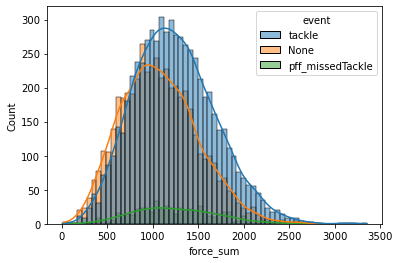

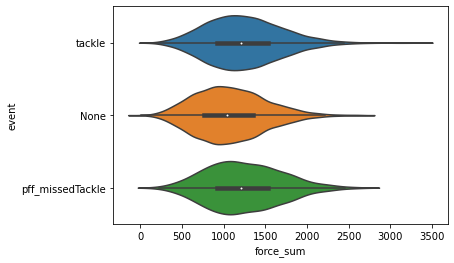

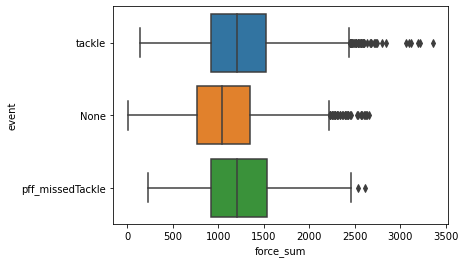

----------------------------------------------------
----------------------------------------------------
force_x_diff


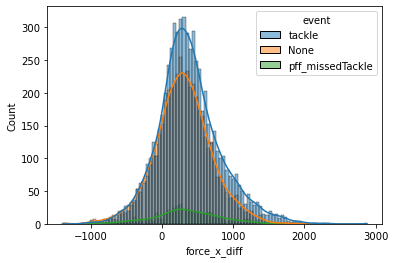

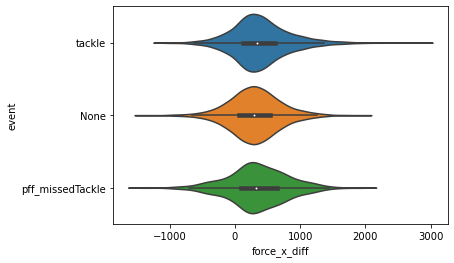

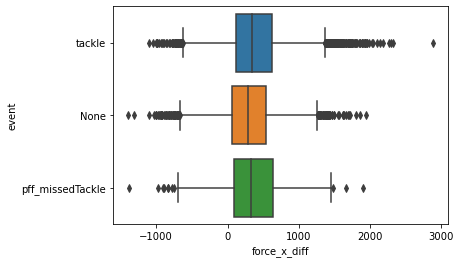

----------------------------------------------------
----------------------------------------------------
force_x_sum


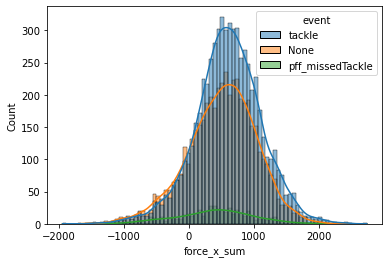

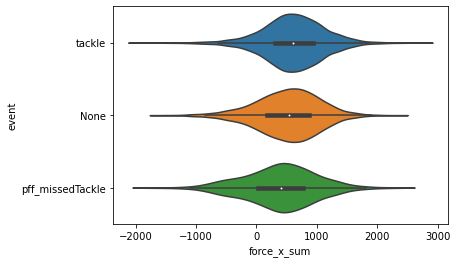

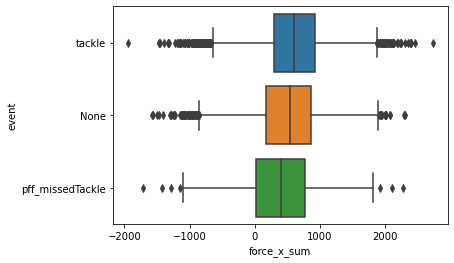

----------------------------------------------------
----------------------------------------------------
force_y_diff


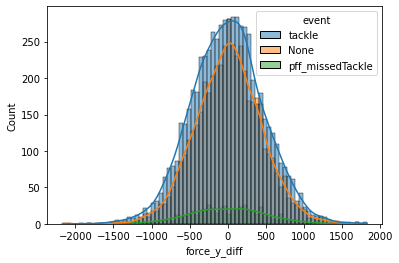

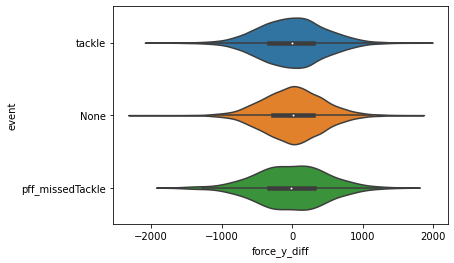

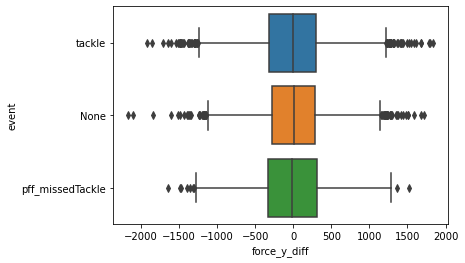

----------------------------------------------------
----------------------------------------------------
force_y_sum


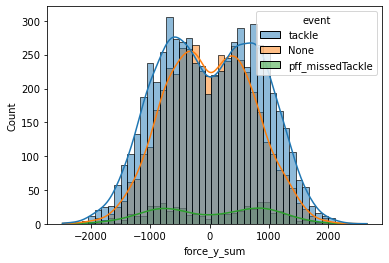

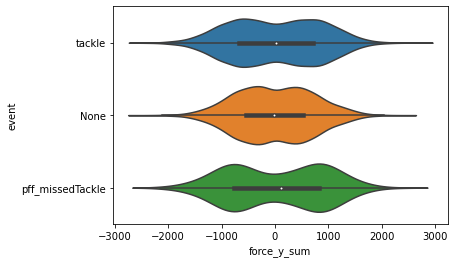

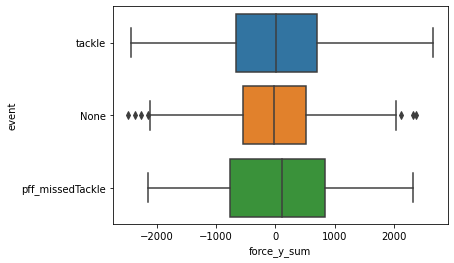

----------------------------------------------------
----------------------------------------------------
momentum_diff


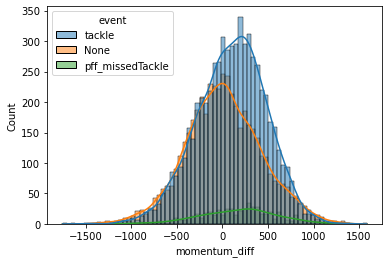

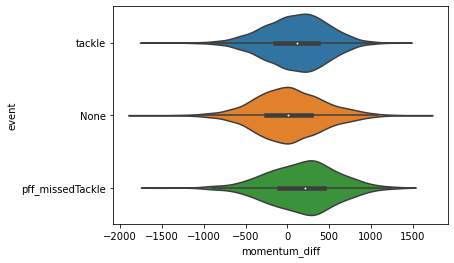

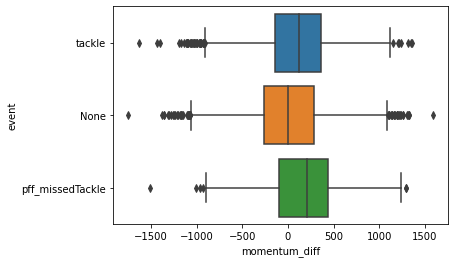

----------------------------------------------------
----------------------------------------------------
momentum_sum


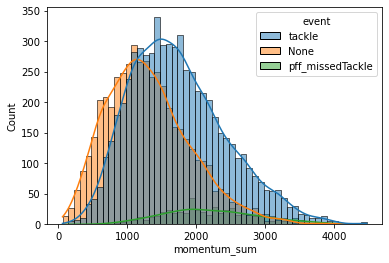

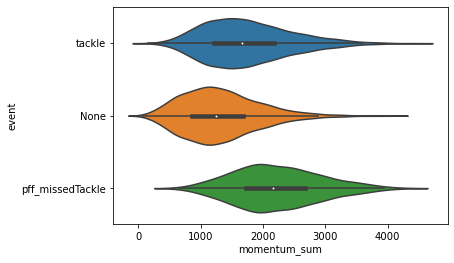

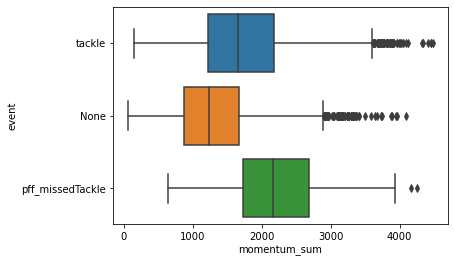

----------------------------------------------------
----------------------------------------------------
momentum_x_diff


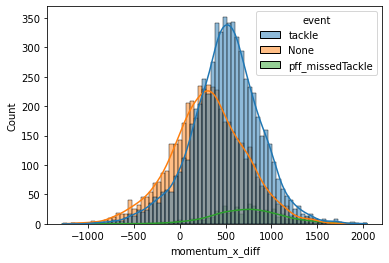

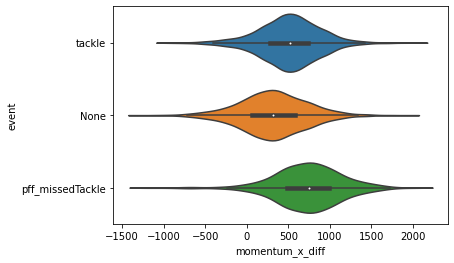

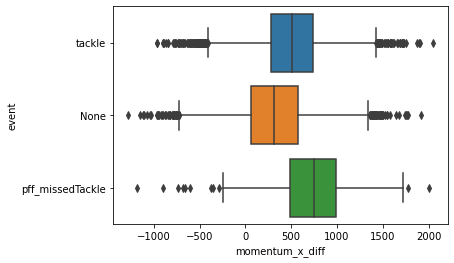

----------------------------------------------------
----------------------------------------------------
momentum_x_sum


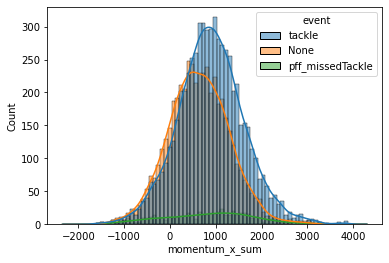

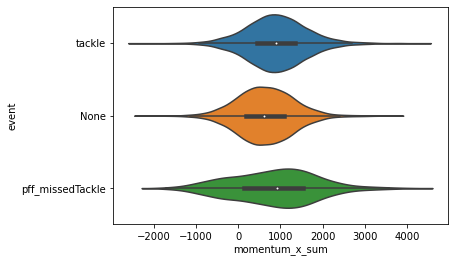

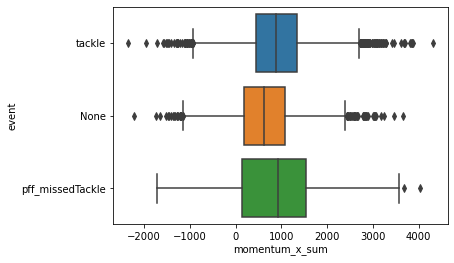

----------------------------------------------------
----------------------------------------------------
momentum_y_diff


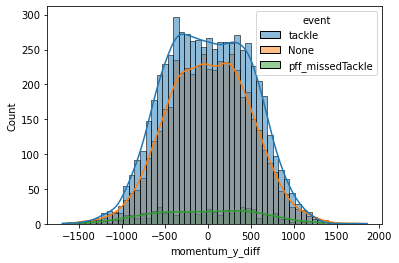

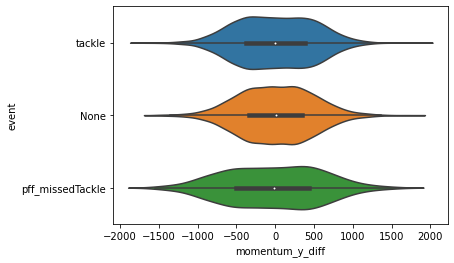

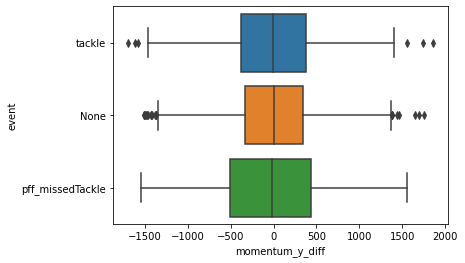

----------------------------------------------------
----------------------------------------------------
momentum_y_sum


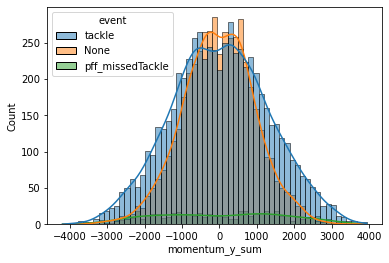

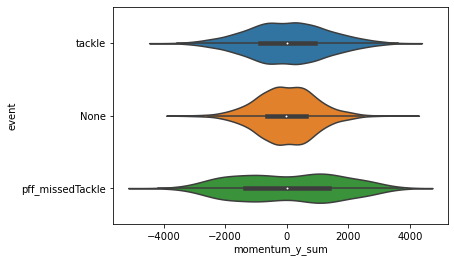

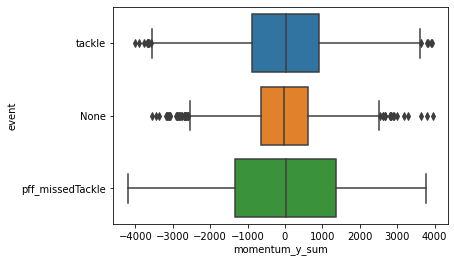

----------------------------------------------------
----------------------------------------------------
x_contact


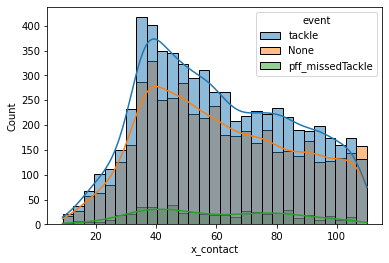

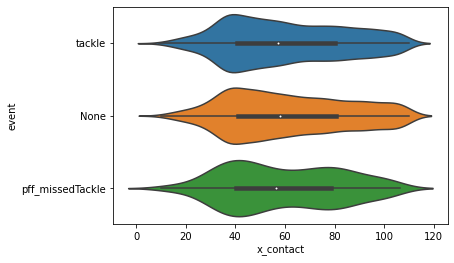

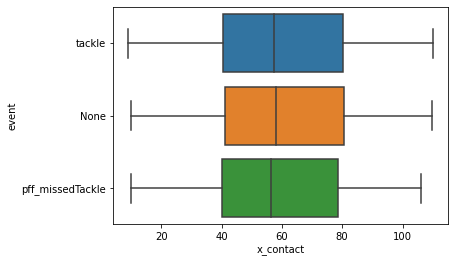

----------------------------------------------------
----------------------------------------------------
y_contact


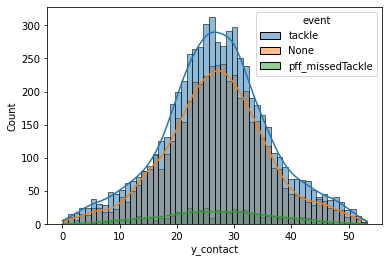

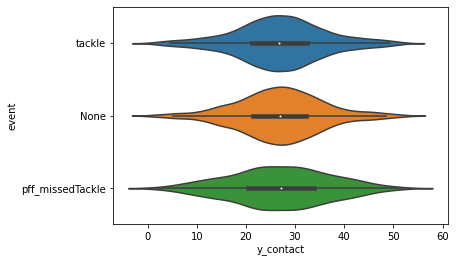

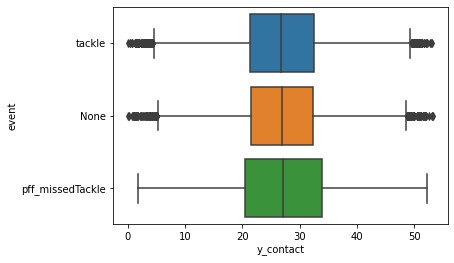

----------------------------------------------------
----------------------------------------------------
tackler_to_contact_dist


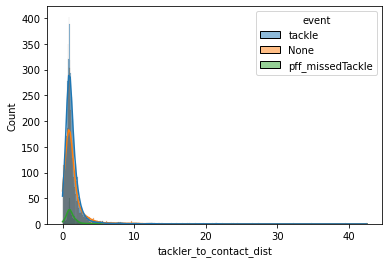

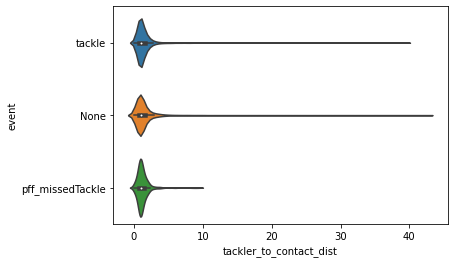

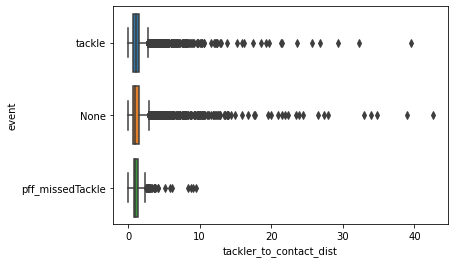

----------------------------------------------------
----------------------------------------------------
ball_carrier_to_contact_dist


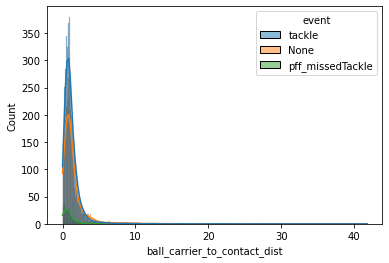

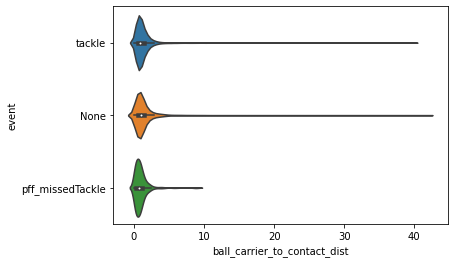

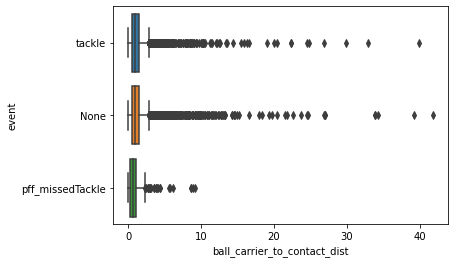

----------------------------------------------------
----------------------------------------------------
tackler_time_to_contact


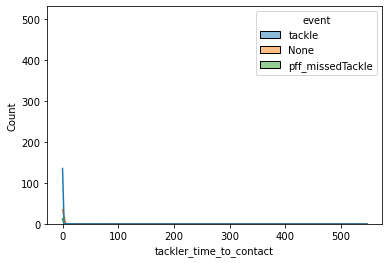

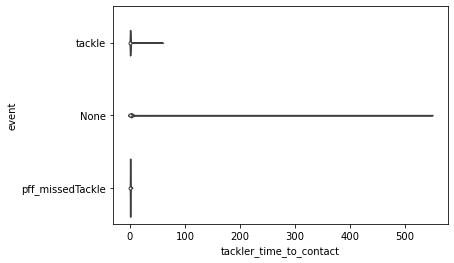

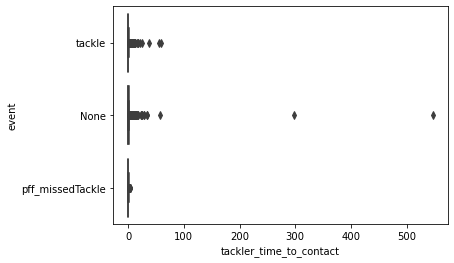

----------------------------------------------------
----------------------------------------------------
ball_carrier_time_to_contact


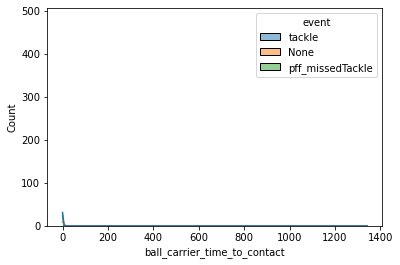

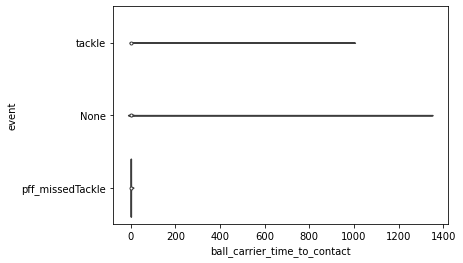

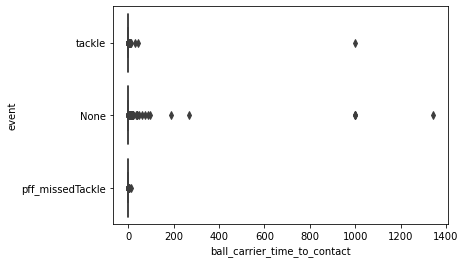

----------------------------------------------------
----------------------------------------------------
diff_time_to_contact


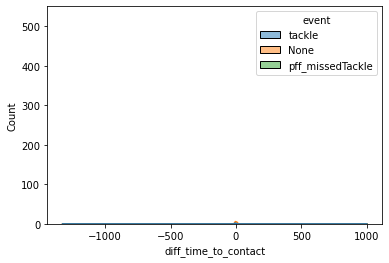

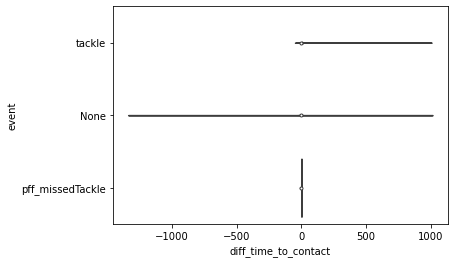

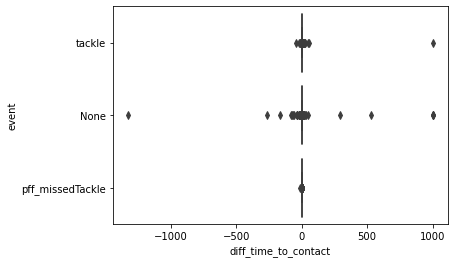

----------------------------------------------------
----------------------------------------------------
contact_angle


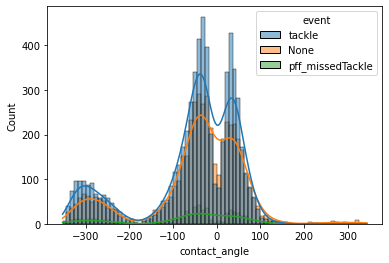

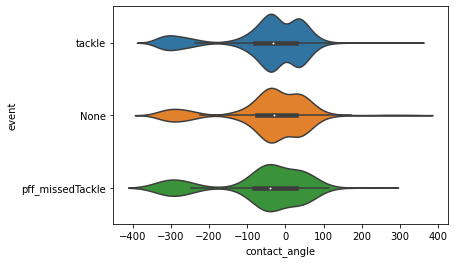

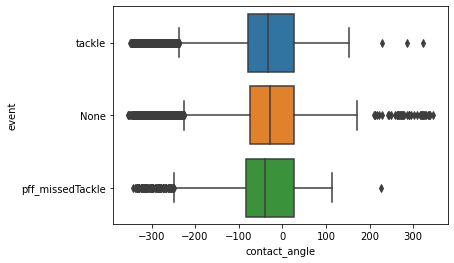

----------------------------------------------------
----------------------------------------------------
contact_angle_cos


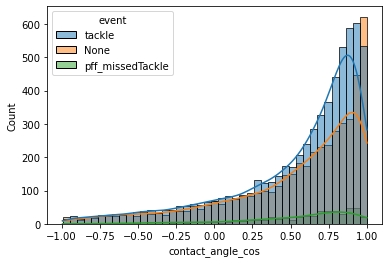

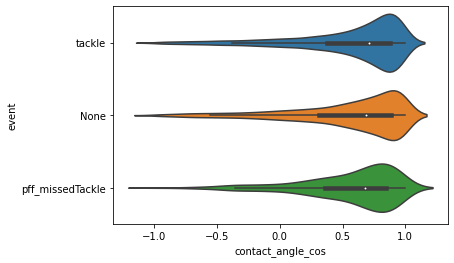

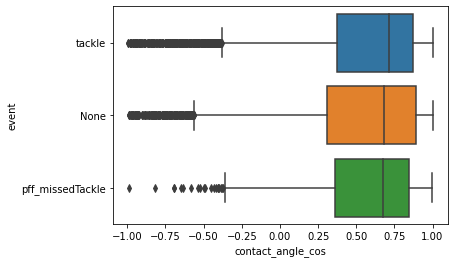

----------------------------------------------------
----------------------------------------------------
contact_angle_force


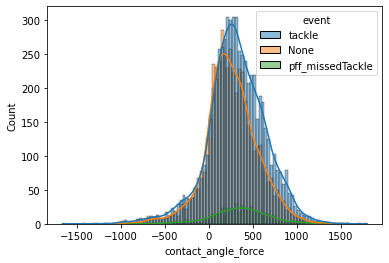

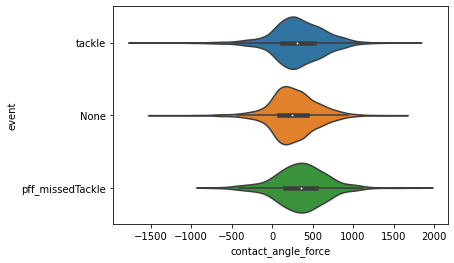

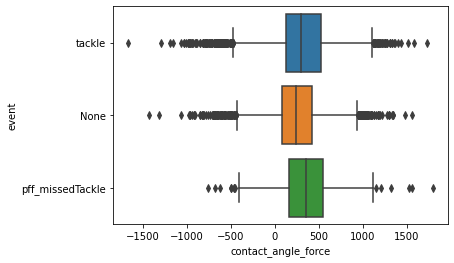

----------------------------------------------------
----------------------------------------------------
contact_angle_force_y


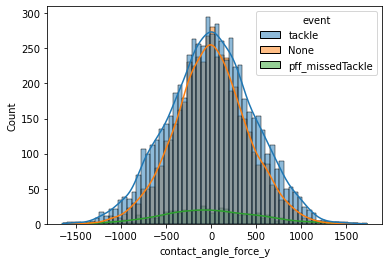

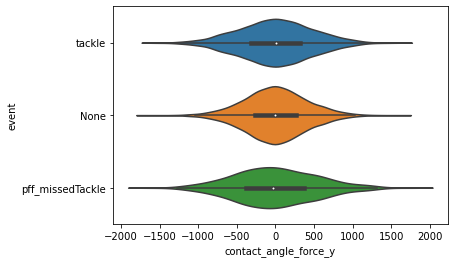

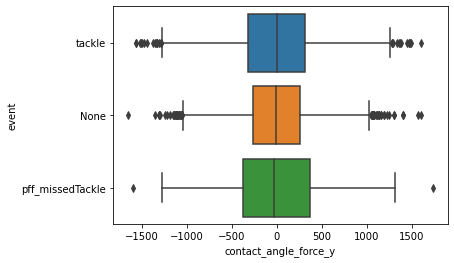

----------------------------------------------------
----------------------------------------------------
contact_angle_force_y_abs


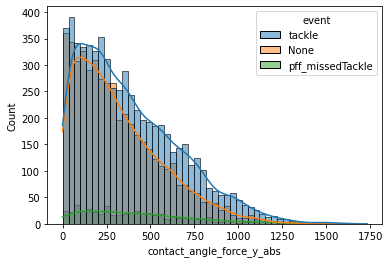

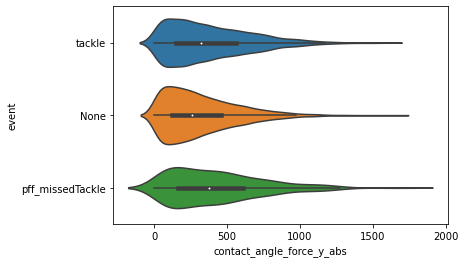

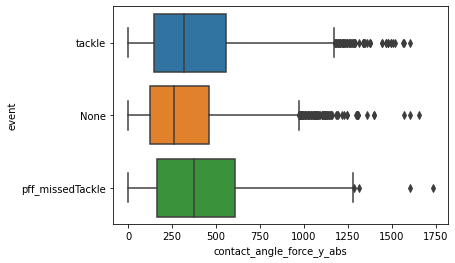

----------------------------------------------------
----------------------------------------------------
contact_angle_force_diff


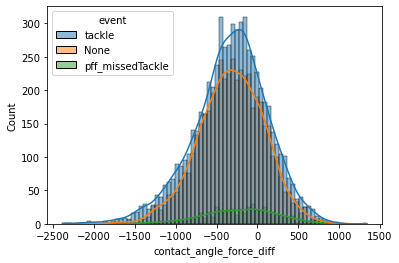

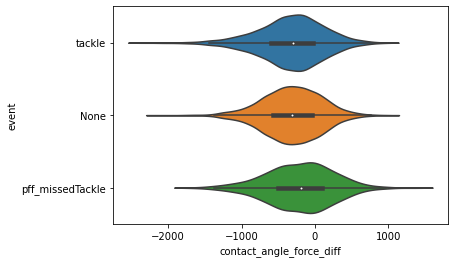

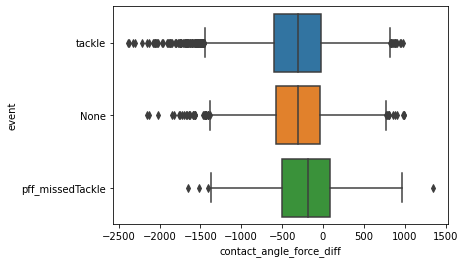

----------------------------------------------------
----------------------------------------------------
contact_angle_force_sum


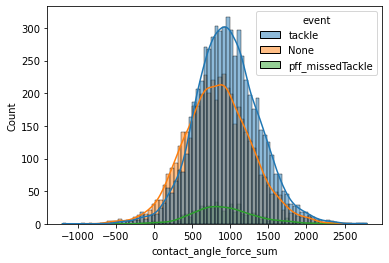

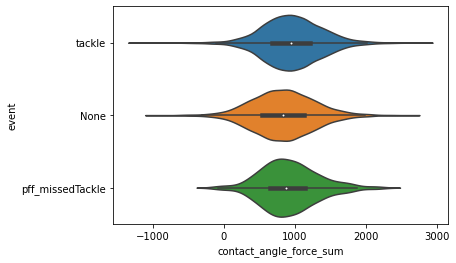

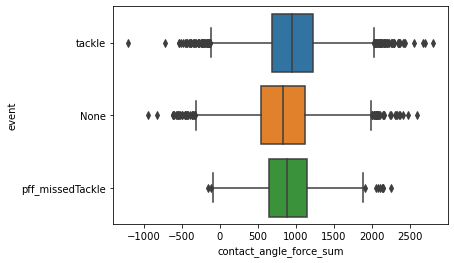

----------------------------------------------------
----------------------------------------------------
contact_angle_momentum


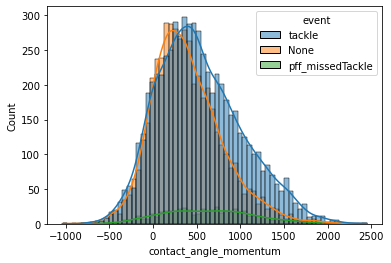

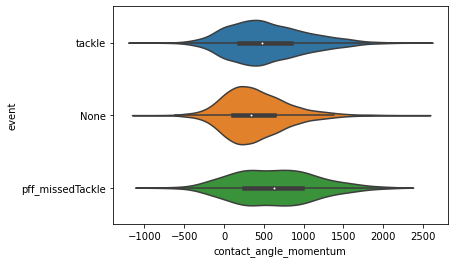

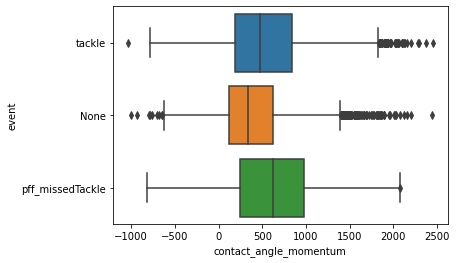

----------------------------------------------------
----------------------------------------------------
contact_angle_momentum_y


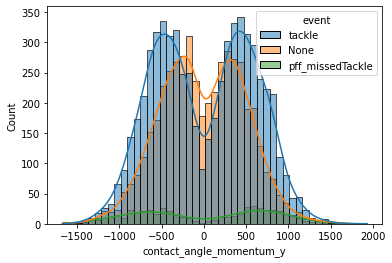

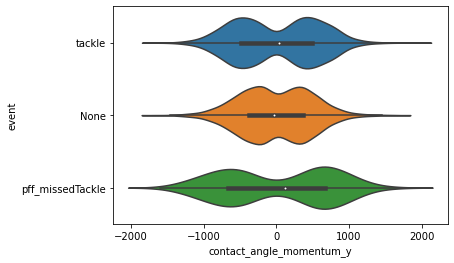

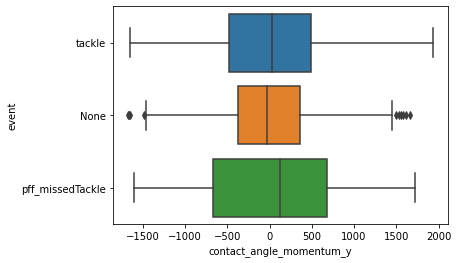

----------------------------------------------------
----------------------------------------------------
contact_angle_momentum_y_abscontact_angle_momentum_diff


ValueError: Could not interpret value `contact_angle_momentum_y_abscontact_angle_momentum_diff` for parameter `x`

In [24]:
for metric in player_diff_metric_columns:
    print(metric)
    hist(metrics_df, metric)
    violin(metrics_df, metric)
    box(metrics_df, metric)
    print("----------------------------------------------------")
    print("----------------------------------------------------")

# More Plotting

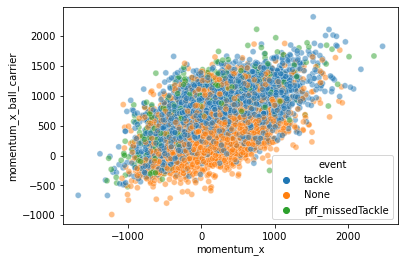

In [25]:
sns.scatterplot(metrics_df, x="momentum_x", y="momentum_x_ball_carrier", hue="event", alpha=0.5)

In [26]:
def regression(df, metric):
    ax = sns.scatterplot(df, x=metric, y=f"{metric}_ball_carrier", 
                         hue='event', hue_order=df['event'].unique(), alpha=0.3)
    for event_type in df['event'].unique():
        plotting_df = df.copy()
        plotting_df = plotting_df[plotting_df['event'] == event_type]
        sns.regplot(plotting_df, x=metric, y=f"{metric}_ball_carrier", scatter=False)
    plt.show()

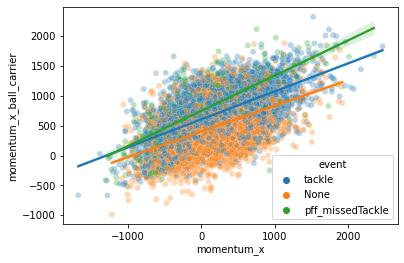

In [27]:
regression(metrics_df, "momentum_x")

In [28]:
scatter_metric_columns = ['x', 'y', 's', 'a', 'dis', 'o', 'dir',
       'force', 'force_x', 'force_y', 'momentum', 'momentum_x',
       'momentum_y', 'in_phase']

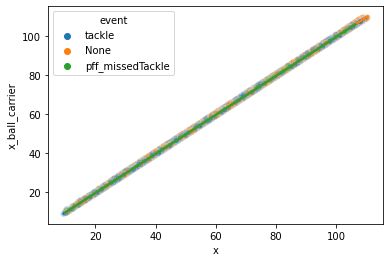

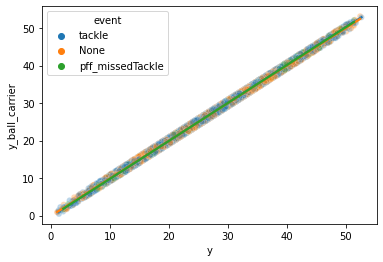

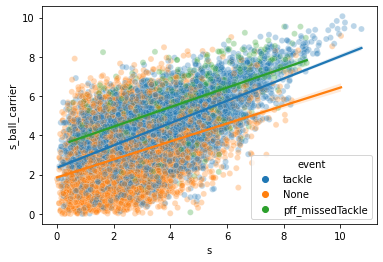

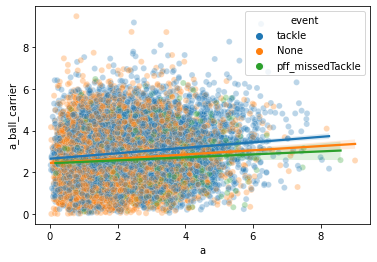

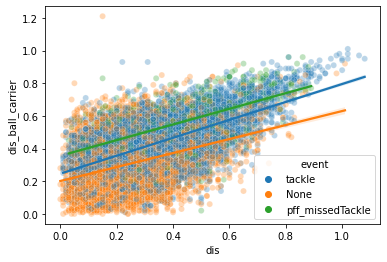

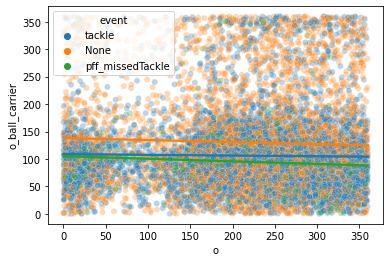

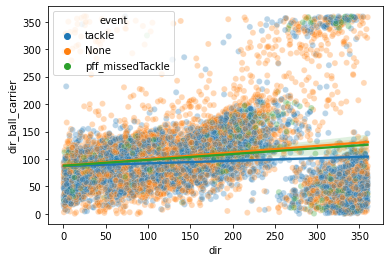

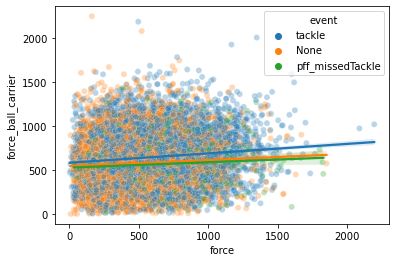

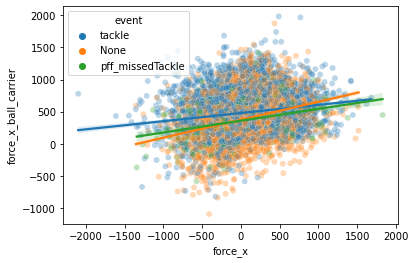

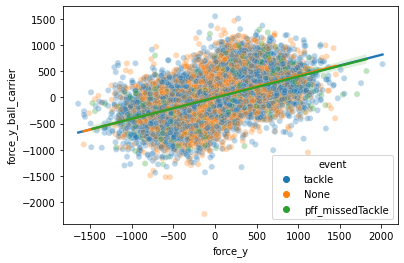

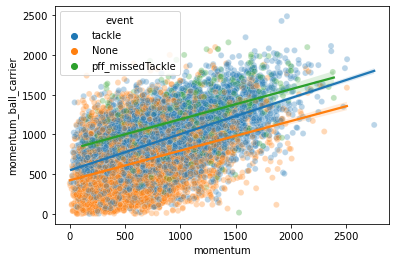

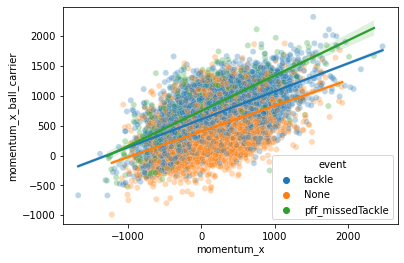

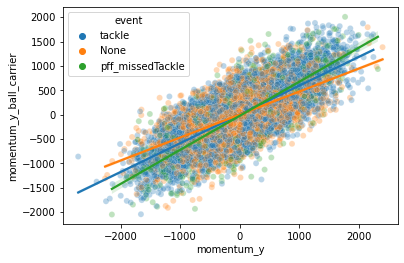

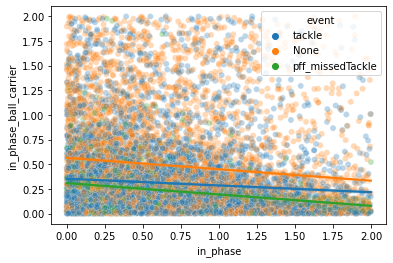

In [29]:
for metric_column in scatter_metric_columns:
    regression(metrics_df, metric_column)

# Field Location Plots

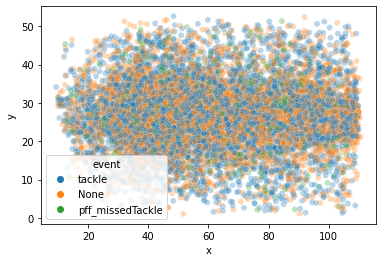

In [30]:
sns.scatterplot(metrics_df, x='x', y='y', 
                     hue='event', hue_order=metrics_df['event'].unique(), alpha=0.3)

## Add Line of Scrimage

In [32]:
plays_df = pd.read_csv('../data/raw/plays.csv')

In [33]:
plays_df['LOS'] = plays_df.apply(lambda x: (100 - x['yardlineNumber']) if x['yardlineSide'] == x['defensiveTeam'] else x['yardlineNumber'], axis=1)

In [34]:
new_metrics_df = metrics_df.merge(plays_df[['gameId', 'playId', 'LOS']], on=['gameId', 'playId'])

In [35]:
new_metrics_df['x_LOS'] = new_metrics_df['x'] - new_metrics_df['LOS']
new_metrics_df['x_LOS_ball_carrier'] = new_metrics_df['x_ball_carrier'] - new_metrics_df['LOS']

In [36]:
new_metrics_df['x_contact_LOS'] = new_metrics_df['x_contact'] - new_metrics_df['LOS']

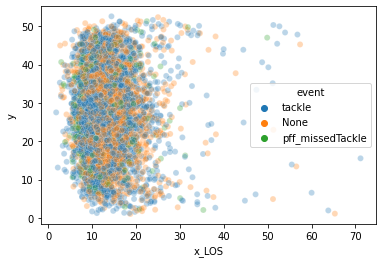

In [37]:
sns.scatterplot(new_metrics_df, x='x_LOS', y='y', 
                     hue='event', alpha=0.3)

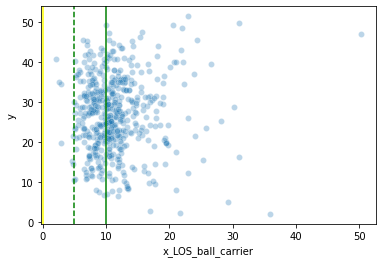

In [38]:
ax = sns.scatterplot(new_metrics_df[new_metrics_df['event'] == 'pff_missedTackle'],
                     x='x_LOS_ball_carrier', y='y', alpha=0.3)
ax.axvline(x=0, color='yellow')
ax.axvline(x=5, color='green', linestyle='--')
ax.axvline(x=10, color='green')

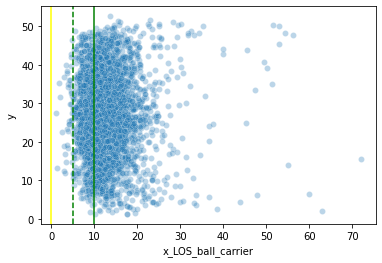

In [39]:
ax = sns.scatterplot(new_metrics_df[new_metrics_df['event'] == 'tackle'],
                     x='x_LOS_ball_carrier', y='y', alpha=0.3)
ax.axvline(x=0, color='yellow')
ax.axvline(x=5, color='green', linestyle='--')
ax.axvline(x=10, color='green')

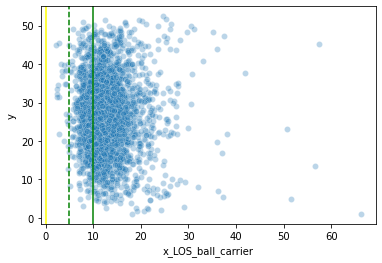

In [40]:
ax = sns.scatterplot(new_metrics_df[new_metrics_df['event'] == 'None'],
                     x='x_LOS_ball_carrier', y='y', alpha=0.3)
ax.axvline(x=0, color='yellow')
ax.axvline(x=5, color='green', linestyle='--')
ax.axvline(x=10, color='green')

(-10.0, 60.0)

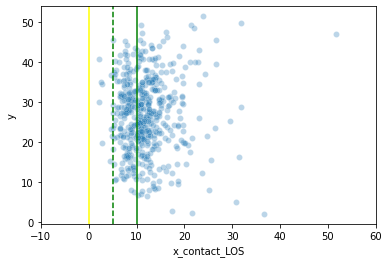

In [41]:
ax = sns.scatterplot(new_metrics_df[new_metrics_df['event'] == 'pff_missedTackle'],
                     x='x_contact_LOS', y='y', alpha=0.3)
ax.axvline(x=0, color='yellow')
ax.axvline(x=5, color='green', linestyle='--')
ax.axvline(x=10, color='green')
ax.set_xlim(-10, 60)

# Orientation vs Direction

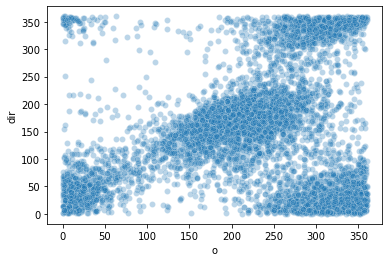

In [42]:
sns.scatterplot(metrics_df[metrics_df['event'] == 'tackle'], x='o', y='dir', alpha=0.3)

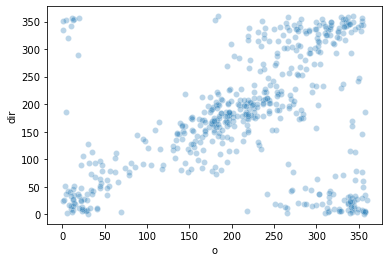

In [43]:
sns.scatterplot(metrics_df[metrics_df['event'] == 'pff_missedTackle'], x='o', y='dir', alpha=0.3)

## Speed v Weight

In [44]:
def regression_2(df, metric1, metric2):
    ax = sns.scatterplot(df, x=metric1, y=metric2, 
                         hue='event', hue_order=df['event'].unique(), alpha=0.3)
    for event_type in df['event'].unique():
        plotting_df = df.copy()
        plotting_df = plotting_df[plotting_df['event'] == event_type]
        sns.regplot(plotting_df, x=metric1, y=metric2, scatter=False)
    plt.show()

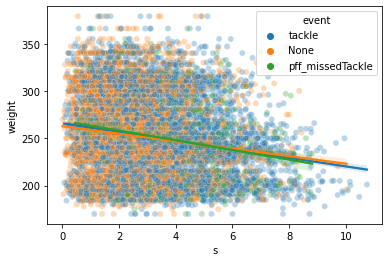

In [48]:
regression_2(metrics_df, 's', 'weight')

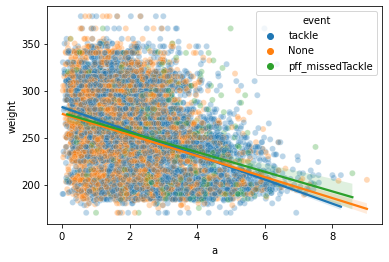

In [49]:
regression_2(metrics_df, 'a', 'weight')

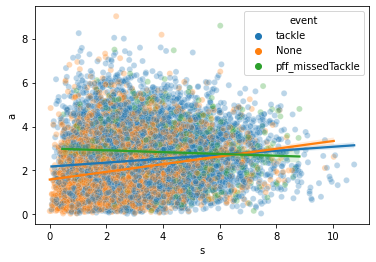

In [50]:
regression_2(metrics_df, 's', 'a')

## Momentum_x v Momentum_y

Take the absolute value of the momentum in the y direction to normalize the plot

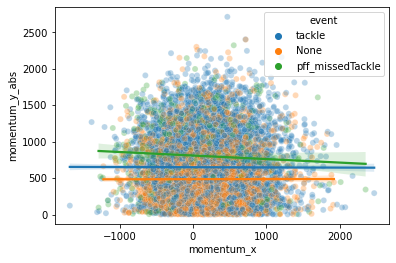

In [51]:
regression_2(metrics_df, 'momentum_x', 'momentum_y_abs')

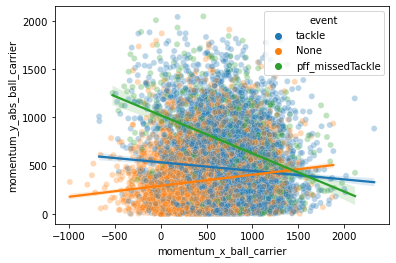

In [52]:
regression_2(metrics_df, 'momentum_x_ball_carrier', 'momentum_y_abs_ball_carrier')

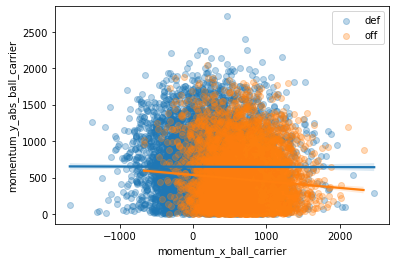

In [53]:
plotting_df = metrics_df[metrics_df['event'] == 'tackle']
ax = sns.regplot(plotting_df, x='momentum_x', y='momentum_y_abs',
                 label='def', scatter_kws={'alpha': 0.3})
sns.regplot(plotting_df, x='momentum_x_ball_carrier', y='momentum_y_abs_ball_carrier',
            label='off', scatter_kws={'alpha': 0.3})
plt.legend()
plt.show()

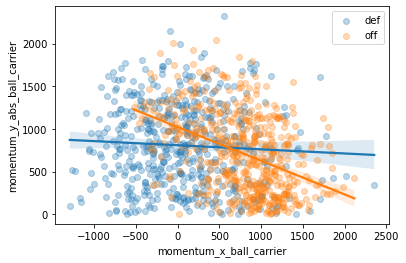

In [54]:
plotting_df = metrics_df[metrics_df['event'] == 'pff_missedTackle']
ax = sns.regplot(plotting_df, x='momentum_x', y='momentum_y_abs',
                 label='def', scatter_kws={'alpha': 0.3})
sns.regplot(plotting_df, x='momentum_x_ball_carrier', y='momentum_y_abs_ball_carrier',
            label='off', scatter_kws={'alpha': 0.3})
plt.legend()
plt.show()

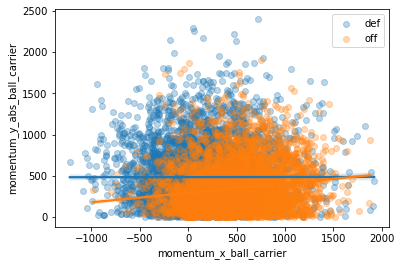

In [55]:
plotting_df = metrics_df[metrics_df['event'] == 'None']
ax = sns.regplot(plotting_df, x='momentum_x', y='momentum_y_abs',
                 label='def', scatter_kws={'alpha': 0.3})
sns.regplot(plotting_df, x='momentum_x_ball_carrier', y='momentum_y_abs_ball_carrier',
            label='off', scatter_kws={'alpha': 0.3})
plt.legend()
plt.show()

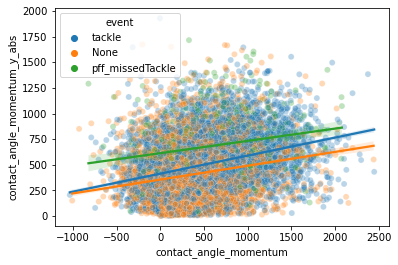

In [56]:
regression_2(metrics_df, 'contact_angle_momentum', 'contact_angle_momentum_y_abs')

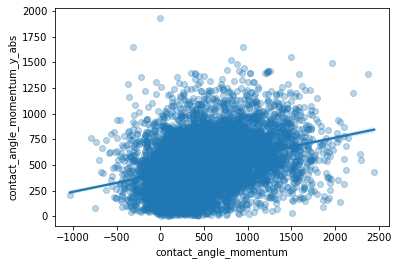

In [57]:
plotting_df = metrics_df[metrics_df['event'] == 'tackle']
sns.regplot(plotting_df, x='contact_angle_momentum', y='contact_angle_momentum_y_abs',
                 label='def', scatter_kws={'alpha': 0.3})

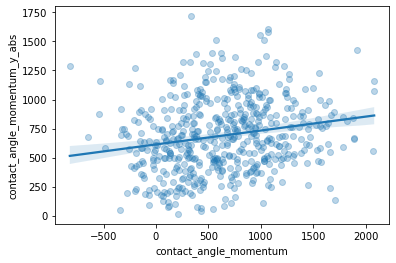

In [58]:
plotting_df = metrics_df[metrics_df['event'] == 'pff_missedTackle']
sns.regplot(plotting_df, x='contact_angle_momentum', y='contact_angle_momentum_y_abs',
                 label='def', scatter_kws={'alpha': 0.3})

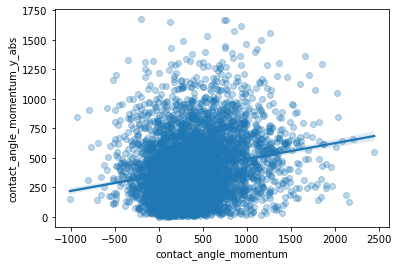

In [59]:
plotting_df = metrics_df[metrics_df['event'] == 'None']
sns.regplot(plotting_df, x='contact_angle_momentum', y='contact_angle_momentum_y_abs',
                 label='def', scatter_kws={'alpha': 0.3})

## Momentum_x Lowess Regression

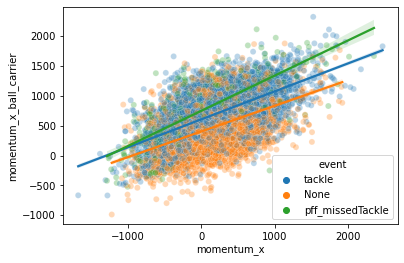

In [61]:
regression(metrics_df, 'momentum_x')

In [62]:
def regression_lowess(df, metric):
    ax = sns.scatterplot(df, x=metric, y=f"{metric}_ball_carrier", 
                         hue='event', hue_order=df['event'].unique(), alpha=0.3)
    for event_type in df['event'].unique():
        plotting_df = df.copy()
        plotting_df = plotting_df[plotting_df['event'] == event_type]
        sns.lmplot(plotting_df, x=metric, y=f"{metric}_ball_carrier",
                   lowess=True, scatter=False)
    plt.show()

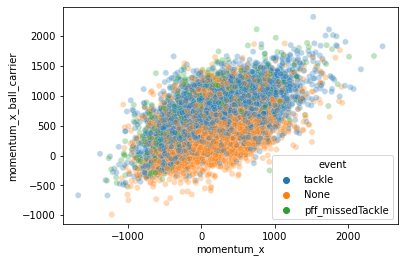

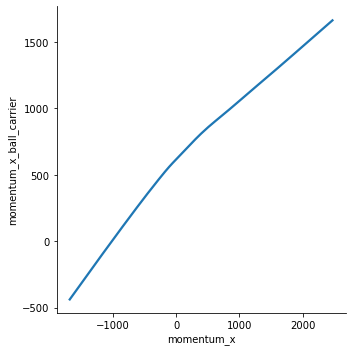

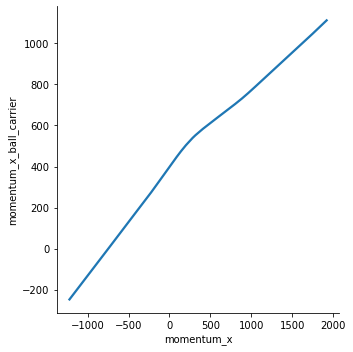

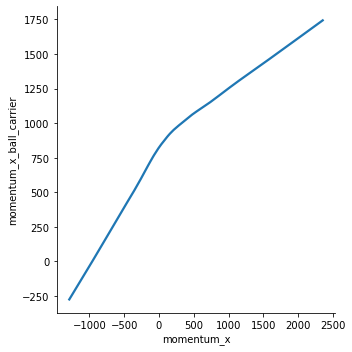

In [63]:
regression_lowess(metrics_df, 'momentum_x')

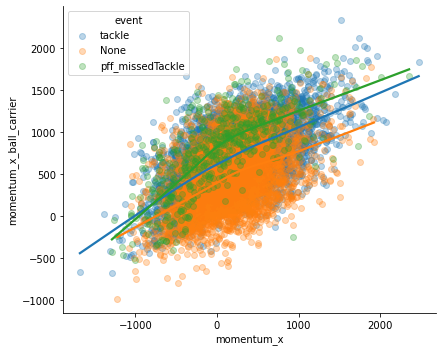

In [69]:
sns.lmplot(metrics_df, x="momentum_x", y="momentum_x_ball_carrier", lowess=True,
           hue='event', hue_order=metrics_df['event'].unique(), aspect=1.25,
           scatter_kws={'alpha': 0.3},
           facet_kws={'legend_out':False})

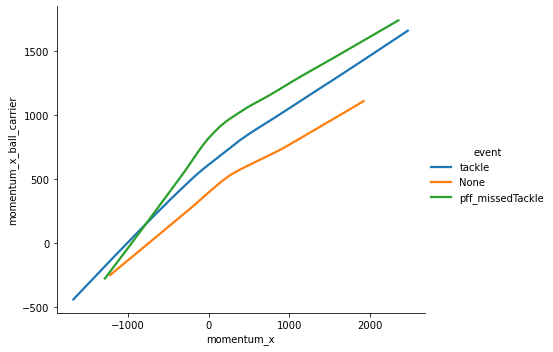

In [70]:
ax = sns.lmplot(metrics_df, x="momentum_x", y="momentum_x_ball_carrier", lowess=True,
           hue='event', hue_order=metrics_df['event'].unique(), aspect=1.25,
           scatter=False)
# ax.axvline(x=0, color='red')

# Weight

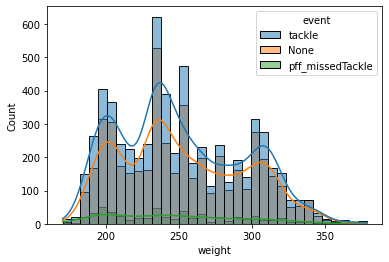

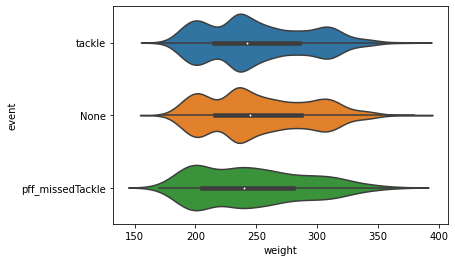

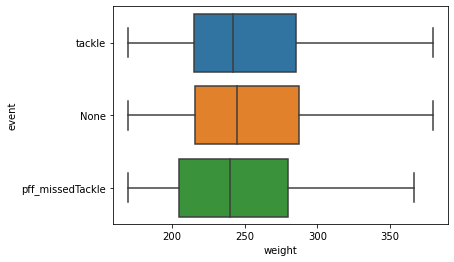

In [71]:
hist(metrics_df, 'weight')
violin(metrics_df, 'weight')
box(metrics_df, 'weight')

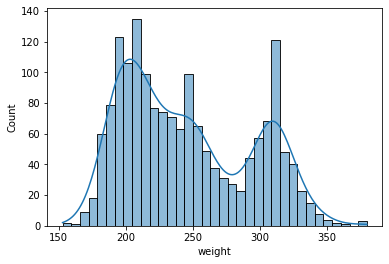

In [73]:
players_df = pd.read_csv('../data/raw/players.csv')
sns.histplot(players_df, x='weight', kde=True, bins=35)

# Player Position Confounder

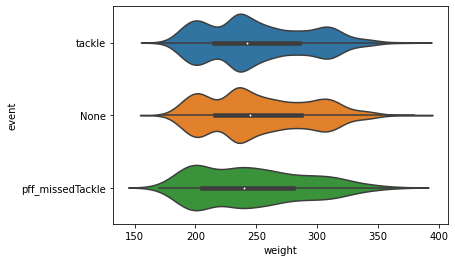

In [74]:
violin(metrics_df, 'weight')

In [75]:
linemen = ['DT', 'DE', 'NT']
linebackers = ['ILB', 'OLB', 'MLB']
backs = ['CB', 'SS', 'FS', 'DB']

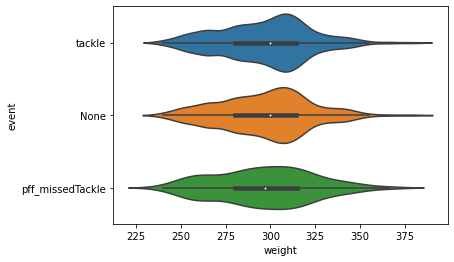

In [76]:
violin(metrics_df[metrics_df['position'].isin(linemen)], 'weight')

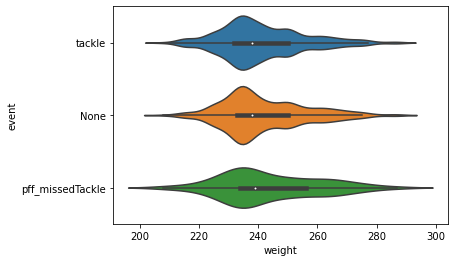

In [77]:
violin(metrics_df[metrics_df['position'].isin(linebackers)], 'weight')

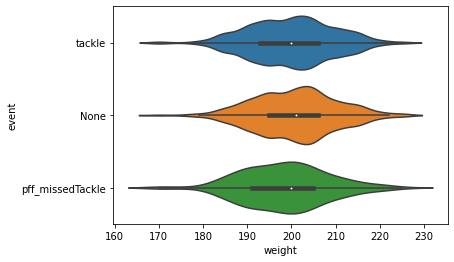

In [78]:
violin(metrics_df[metrics_df['position'].isin(backs)], 'weight')